In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 변수 정의

num = 10
num_coeffs = 1
epochs = 1000
learning_rate = 0.2

In [3]:
# cost 저장

n10_test_cost = []
n20_test_cost = []
n100_test_cost = []

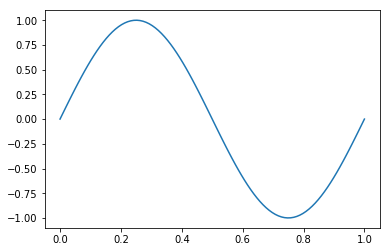

In [4]:
# 정상적인 sin(2πx)의 그래프

sinx = np.linspace(0.0, 1.0, 100)
siny = np.sin(2 * np.pi * sinx)

plt.plot(sinx, siny)
plt.show()

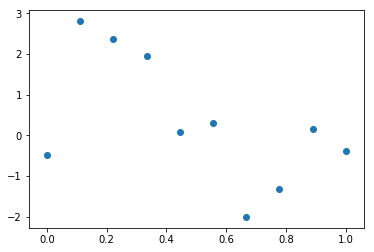

In [5]:
# sin + noise 그래프
# 랜덤 노이즈 생성하는 부분

train_x = np.linspace(0.0, 1.0, num)
#n = np.random.uniform(-0.5, 0.5, num)
n = np.random.normal(0.0, 1.0, num)
train_y = np.sin(2 * np.pi * train_x)
train_y += n

plt.scatter(train_x, train_y)
plt.show()

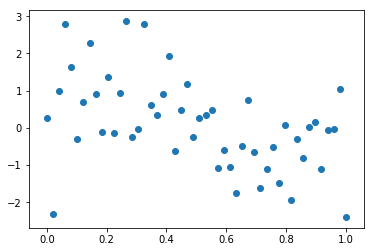

In [6]:
# 테스트 데이터 만들기
test_num = 50

test_x = np.linspace(0.0, 1.0, test_num)
#n = np.random.uniform(-0.5, 0.5, test_num)
n = np.random.normal(0.0, 1.0, test_num)
test_y = np.sin(2 * np.pi * test_x)
test_y += n

plt.scatter(test_x, test_y)
plt.show()

epoch : 0, cost : 34.8187
epoch : 100, cost : 16.4103
epoch : 200, cost : 16.4103
epoch : 300, cost : 16.4103
epoch : 400, cost : 16.4103
epoch : 500, cost : 16.4103
epoch : 600, cost : 16.4103
epoch : 700, cost : 16.4103
epoch : 800, cost : 16.4103
epoch : 900, cost : 16.4103


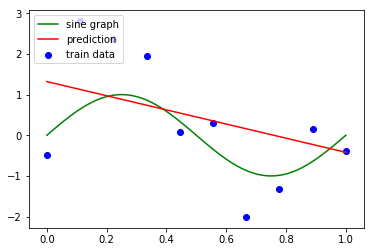

In [7]:
num = 10
num_coeffs = 1

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)

# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    # test 데이터
    n10_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    #plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
    plt.show()

epoch : 0, cost : 29.2844
epoch : 100, cost : 16.0122
epoch : 200, cost : 16.0374
epoch : 300, cost : 16.0507
epoch : 400, cost : 16.0536
epoch : 500, cost : 16.0542
epoch : 600, cost : 16.0543
epoch : 700, cost : 16.0543
epoch : 800, cost : 16.0543
epoch : 900, cost : 16.0543


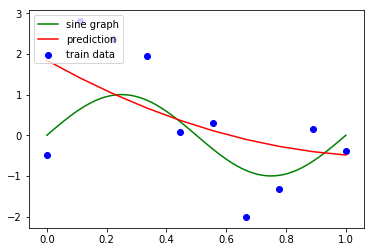

In [8]:
num = 10
num_coeffs = 2

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)

# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작

with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))

    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    # test 데이터
    n10_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    #plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
    plt.show()

epoch : 0, cost : 17.937
epoch : 100, cost : 14.654
epoch : 200, cost : 14.1243
epoch : 300, cost : 13.657
epoch : 400, cost : 13.2469
epoch : 500, cost : 12.8867
epoch : 600, cost : 12.5699
epoch : 700, cost : 12.2908
epoch : 800, cost : 12.0447
epoch : 900, cost : 11.8273


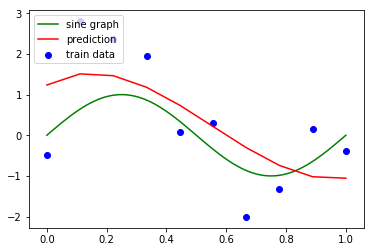

In [9]:
num = 10
num_coeffs = 3

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))

    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    n10_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    #plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
    plt.show()

epoch : 0, cost : 172.765
epoch : 100, cost : 22.6885
epoch : 200, cost : 18.3632
epoch : 300, cost : 15.0083
epoch : 400, cost : 12.3788
epoch : 500, cost : 10.3232
epoch : 600, cost : 8.7163
epoch : 700, cost : 7.45965
epoch : 800, cost : 6.47646
epoch : 900, cost : 5.70683


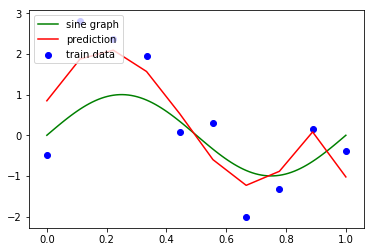

In [10]:
num = 10
num_coeffs = 9

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))

    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
       
    # test 데이터
    n10_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    #plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
    plt.show()

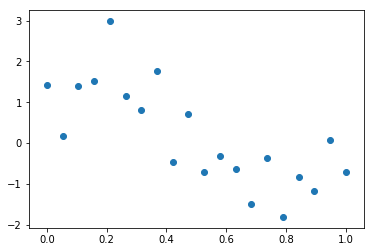

In [11]:
# sin + noise 그래프
# 랜덤 노이즈 생성하는 부분

num = 20

train_x = np.linspace(0.0, 1.0, num)
#n = np.random.uniform(-0.5, 0.5, num)
n = np.random.normal(0.0, 1.0, num)
train_y = np.sin(2 * np.pi * train_x)
train_y += n

plt.scatter(train_x, train_y)
plt.show()

epoch : 0, cost : 34.6782
epoch : 100, cost : 16.1227
epoch : 200, cost : 16.1227
epoch : 300, cost : 16.1227
epoch : 400, cost : 16.1227
epoch : 500, cost : 16.1227
epoch : 600, cost : 16.1227
epoch : 700, cost : 16.1227
epoch : 800, cost : 16.1227
epoch : 900, cost : 16.1227


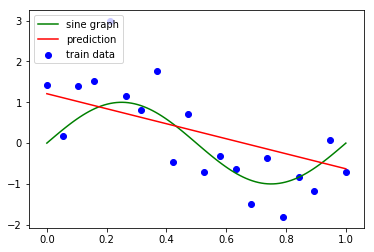

In [12]:
num = 20
num_coeffs = 1

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))

    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    n20_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    #plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
    plt.show()

epoch : 0, cost : 41.3397
epoch : 100, cost : 13.5965
epoch : 200, cost : 13.5847
epoch : 300, cost : 13.5911
epoch : 400, cost : 13.5924
epoch : 500, cost : 13.5926
epoch : 600, cost : 13.5927
epoch : 700, cost : 13.5927
epoch : 800, cost : 13.5927
epoch : 900, cost : 13.5927


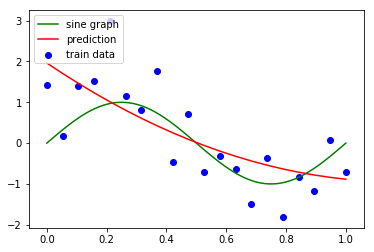

In [13]:
num = 20
num_coeffs = 2

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    n20_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    #plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
    plt.show()

epoch : 0, cost : 93.9209
epoch : 100, cost : 13.7262
epoch : 200, cost : 13.6345
epoch : 300, cost : 13.5546
epoch : 400, cost : 13.4834
epoch : 500, cost : 13.4198
epoch : 600, cost : 13.3631
epoch : 700, cost : 13.3122
epoch : 800, cost : 13.2667
epoch : 900, cost : 13.2257


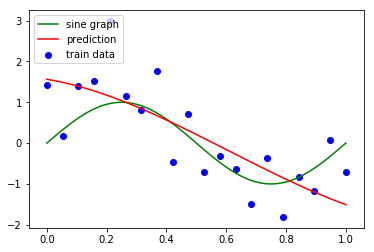

In [14]:
num = 20
num_coeffs = 3

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))

    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    n20_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    #plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
    plt.show()

epoch : 0, cost : 666.458
epoch : 100, cost : 161.541
epoch : 200, cost : 149.478
epoch : 300, cost : 134.825
epoch : 400, cost : 122.284
epoch : 500, cost : 112.535
epoch : 600, cost : 105.115
epoch : 700, cost : 99.51
epoch : 800, cost : 95.2975
epoch : 900, cost : 92.148


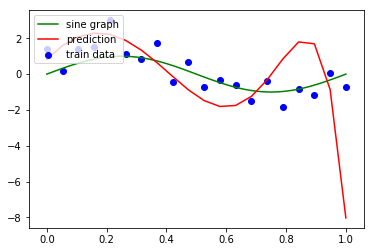

In [15]:
num = 20
num_coeffs = 9

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))

    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    n20_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    #plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
    plt.show()

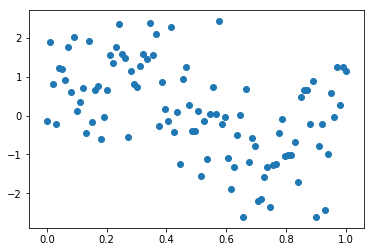

In [16]:
# sin + noise 그래프
# 랜덤 노이즈 생성하는 부분

num = 100

train_x = np.linspace(0.0, 1.0, num)
#n = np.random.uniform(-0.5, 0.5, num)
n = np.random.normal(0.0, 1.0, num)
train_y = np.sin(2 * np.pi * train_x)
train_y += n

plt.scatter(train_x, train_y)
plt.show()

epoch : 0, cost : 218.324
epoch : 100, cost : 221.167
epoch : 200, cost : 221.167
epoch : 300, cost : 221.167
epoch : 400, cost : 221.167
epoch : 500, cost : 221.167
epoch : 600, cost : 221.167
epoch : 700, cost : 221.167
epoch : 800, cost : 221.167
epoch : 900, cost : 221.167


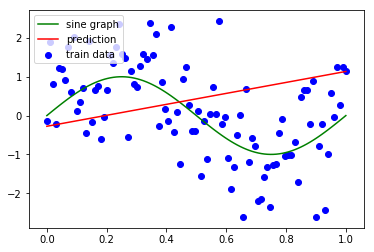

In [17]:
num = 100
num_coeffs = 1

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    n100_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    #plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
plt.show()

epoch : 0, cost : 219.726
epoch : 100, cost : 142.195
epoch : 200, cost : 144.212
epoch : 300, cost : 144.647
epoch : 400, cost : 144.71
epoch : 500, cost : 144.719
epoch : 600, cost : 144.72
epoch : 700, cost : 144.72
epoch : 800, cost : 144.72
epoch : 900, cost : 144.72


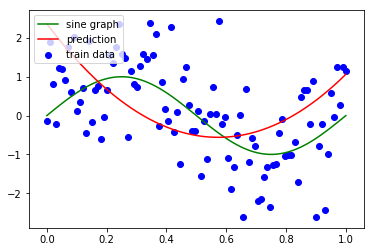

In [18]:
num = 100
num_coeffs = 2

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    n100_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    #plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
plt.show()  

epoch : 0, cost : 170.097
epoch : 100, cost : 110.031
epoch : 200, cost : 106.858
epoch : 300, cost : 104.025
epoch : 400, cost : 101.655
epoch : 500, cost : 99.6724
epoch : 600, cost : 98.0132
epoch : 700, cost : 96.6237
epoch : 800, cost : 95.4594
epoch : 900, cost : 94.483


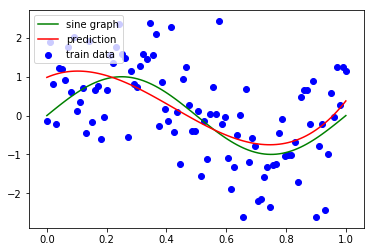

In [ ]:
num = 100
num_coeffs = 3

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    n100_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    #plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
plt.show()      

In [ ]:
num = 100
num_coeffs = 9

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    n100_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    #plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
plt.show()      

epoch : 0, cost : 1.89745e+07
epoch : 100, cost : 4.85132e+06
epoch : 200, cost : 4.86934e+06
epoch : 300, cost : 4.55986e+06
epoch : 400, cost : 4.25862e+06
epoch : 500, cost : 4.03169e+06
epoch : 600, cost : 3.87357e+06
epoch : 700, cost : 3.7671e+06
epoch : 800, cost : 3.69995e+06
epoch : 900, cost : 3.66063e+06


In [ ]:
# n이 10일때 test cost 그래프

x = [0, 1, 2, 8]

plt.plot(x, n10_test_cost, 'o-')
plt.title('n = 10')
plt.xlabel('M')
plt.ylabel('cost')
plt.show()

In [ ]:
# n = 20일때 test cost 그래프

x = [0, 1, 2, 8]

plt.plot(x, n20_test_cost, 'o-')
plt.title('n = 20')
plt.xlabel('M')
plt.ylabel('cost')
plt.show()

In [ ]:
# n = 100일때 test cost 그래프

x = [0, 1, 2, 8]

plt.plot(x, n100_test_cost, 'o-')
plt.title('n = 100')
plt.xlabel('M')
plt.ylabel('cost')
plt.show()